In [265]:
# TO DO 
# For CountVectorizer, play with ngram_range, stop_words, max_df, min_df, max_features 

# IF THERE'S TIME 
# Add Bahasa analysis 
# Add clustering visualization for the data 

# Background
* Explanation of interest rates
* How central banks adjust interest rates to account for changes in the economy
* Motivation for the research

# Preparation 
* Import all necessary libraries
* Import master matrix, which includes data on actual interest rate movements (i.e., the independent variables)  
* Build out the master matrix to include summary statements from the Indonesian central bank 
* Examine the data to evaluate skew 
* Visualize data to better understand word dispersion 

In [266]:
# Import all necessary libraries

import csv
import pandas as pd
import numpy as np
import nltk 
from nltk.draw.dispersion import dispersion_plot
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import metrics 
import matplotlib.pyplot as plt
%matplotlib inline

In [267]:
# Read master matrix for testing and ensure it imported properly 

master = pd.read_csv('C:/Users/ajarczyk/Dropbox/Programming/BI_Project/Master matrix.csv')
master.head()

,Date,Number,Decreased,Same,Increased
0,2/3/2009,1,1,0,0
1,3/20/2009,2,1,0,0
2,4/20/2009,3,1,0,0
3,5/13/2009,4,1,0,0
4,6/9/2009,5,1,0,0


In [268]:
# Open training files for each training group and add to a column in the master matrix 

text = []
for i in master.Number:
    fname = 'C:/Users/ajarczyk/Dropbox/Programming/BI_Project/BIEngStatement' + str(i) + '.txt'
    temp = open(fname).read().decode('utf_16')
    text.append(temp)
master['text'] = text

In [269]:
# Examine breakdown for the total sample 

master[['Decreased', 'Same', 'Increased']].sum()

Decreased    10
Same         67
Increased     5
dtype: int64

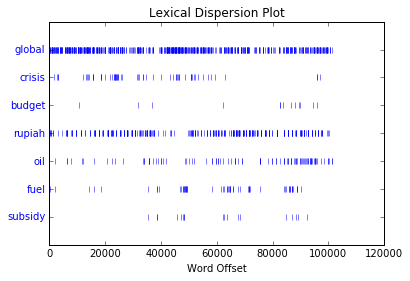

In [270]:
txt = ""
for i in (master.Number - 1):
    txt = txt + master['text'][i]
tokens = nltk.word_tokenize(txt)
txt = nltk.Text(tokens)
dispersion_plot(txt, ['global', 'crisis', 'budget', 'rupiah', 'oil', 'fuel', 'subsidy'])

# Data Analysis
* Break down the documents into n-grams and eliminate the least useful words 
* Break the data set into testing and training subsets 
* Set a benchmark for performance by evaluating the prior 
* Develop models using Multinomial Naive Bayes, Bernoulli Naive Bayes, Logistic Regression, and SVM
* Evaluate the models' accuracy on the testing data and training data
* Draw the models' ROC curves and calculate their AUCs 

In [271]:
# Separate the individual words in the documents

vectorizer = CountVectorizer(ngram_range=(1, 2), max_df=0.8) 
X = vectorizer.fit_transform(master.text)
y = (master.Same == 1).values.astype(np.int)

In [272]:
# Use SKLearn's train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=36)

In [273]:
# Print the accuracy on the test and training dataset (Adapted from Misrab's example)

def accuracy_report(_clf):
    training_accuracy = _clf.score(xtrain, ytrain)
    test_accuracy = _clf.score(xtest, ytest)

    print "Accuracy on training data: %0.2f%%" % (100 * training_accuracy)
    print "Accuracy: %0.2f%%" % (100 * test_accuracy)
    
    return training_accuracy, test_accuracy

In [274]:
# Adjust to see how prior works on test set 

atb = float(sum(ytest))/len(ytest) * 100
print "Accuracy to beat: %0.2f" % atb + "%"

Accuracy to beat: 76.47%


In [275]:
# Run Multinomial NB and report accuracy
clf = MultinomialNB()
clf.fit(xtrain, ytrain)
tra_acc1, tes_acc1 = accuracy_report(clf)

Accuracy on training data: 92.31%
Accuracy: 76.47%


In [276]:
# Aggregate stats for ROC curve chart
# Some code sourced from: http://blog.yhat.com/posts/roc-curves.html 
# Some code also sourced from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

preds = clf.predict_proba(xtest)[:,1]
fpr, tpr, _ = metrics.roc_curve(ytest, preds)
df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
auc1 = metrics.roc_auc_score(ytest, preds)
print "AUC: ", auc1

AUC:  0.548076923077


In [277]:
# Run Bernoulli NB for comparison

clf = BernoulliNB()
clf.fit(xtrain, ytrain)
tra_acc2, tes_acc2 = accuracy_report(clf)

Accuracy on training data: 90.77%
Accuracy: 82.35%


In [278]:
# Aggregate stats for ROC curve chart

preds = clf.predict_proba(xtest)[:,1]
fpr2, tpr2, _ = metrics.roc_curve(ytest, preds)
df2 = pd.DataFrame(dict(fpr2=fpr2, tpr2=tpr2))
auc2 = metrics.roc_auc_score(ytest, preds)
print "AUC: ", auc2

AUC:  0.509615384615


In [279]:
# Run Logistic Regression for comparison

clf = LogisticRegression()
clf.fit(xtrain, ytrain)
tra_acc3, tes_acc3 = accuracy_report(clf)

Accuracy on training data: 100.00%
Accuracy: 76.47%


In [280]:
# Aggregate stats for ROC curve chart

preds = clf.predict_proba(xtest)[:,1]
fpr3, tpr3, _ = metrics.roc_curve(ytest, preds)
df3 = pd.DataFrame(dict(fpr3=fpr3, tpr3=tpr3))
auc3 = metrics.roc_auc_score(ytest, preds)
print "AUC: ", auc3

AUC:  0.653846153846


In [281]:
# Run SVM for comparison

clf = svm.SVC(kernel='linear', probability=True)
clf.fit(xtrain, ytrain)
tra_acc4, tes_acc4 = accuracy_report(clf)

Accuracy on training data: 100.00%
Accuracy: 76.47%


In [282]:
# Aggregate stats for ROC curve chart

preds = clf.predict_proba(xtest)[:,1]
fpr4, tpr4, _ = metrics.roc_curve(ytest, preds)
df4 = pd.DataFrame(dict(fpr4=fpr4, tpr4=tpr4))
auc4 = metrics.roc_auc_score(ytest, preds)
print "AUC: ", auc4

AUC:  0.653846153846


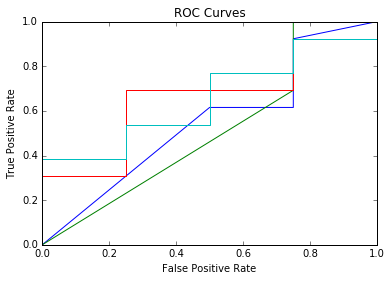

In [283]:
# Plot ROC curves for the various models

plt.figure()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.plot(df["fpr"], df["tpr"])
plt.plot(df2["fpr2"], df2["tpr2"])
plt.plot(df3["fpr3"], df3["tpr3"])
plt.plot(df4["fpr4"], df4["tpr4"])

In [284]:
# Evaluate the various models 
baseline = ['NA', 'NA', atb/100]
mnb = [auc1, tra_acc1, tes_acc1]
bnb = [auc2, tra_acc2, tes_acc2]
lr = [auc3, tra_acc3, tes_acc3]
svm = [auc4, tra_acc4, tes_acc4]
index = ['Baseline', 'Multinomial NB', 'Bernoulli NB', 'Linear Regression', 'SVM']
pfmtrx = pd.DataFrame([baseline, mnb, bnb, lr, svm], index=index,
             columns=['AUC', 'Training Set Accuracy', 'Testing Set Accuracy'])
pfmtrx.sort_values(by='Testing Set Accuracy')

,AUC,Training Set Accuracy,Testing Set Accuracy
Baseline,NA,NA,0.764706
Multinomial NB,0.548077,0.923077,0.764706
Linear Regression,0.653846,1,0.764706
SVM,0.653846,1,0.764706
Bernoulli NB,0.509615,0.907692,0.823529


In [ ]:
#classifier = OneVsRestClassifier(MultinomialNB())
#preds = classifier.fit(xtrain, ytrain).predict_proba(xtest)[:, 0]
#preds

In [ ]:
#ytest - preds

In [ ]:
# Code from http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html 

#n_classes = ytest.shape[0]
#preds = clf.predict_proba(xtest)

#fpr = dict()
#tpr = dict()
#for i in range(n_classes):
#    fpr[i], tpr[i], _ = roc_curve(ytest[:, i], preds[:, i])

In [57]:
# Original format for Multinoulli, Bernoulli, and Logistic Regression
clf = BernoulliNB().fit(xtrain, ytrain)
accuracy_report(clf)

Accuracy on training data: 83.67%
Accuracy: 78.79%


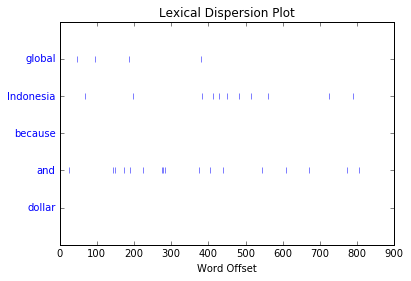

<Text: The global economic crisis has taken a more...>

In [58]:
txt = master['text'][0]
tokens = nltk.word_tokenize(txt)
text2 = nltk.Text(tokens)
dispersion_plot(text2, ['global', 'Indonesia', 'because', 'and', 'dollar'])
text2

In [156]:
aucs = {'Multinomial NB': auc1, 'Bernoulli NB': auc2, 'Linear Regression': auc3, 'SVM': auc4}
pd.DataFrame(data=aucs, index={"Model AUC"})

,Bernoulli NB,Linear Regression,Multinomial NB,SVM
Model AUC,0.5,0.711538,0.625,0.711538
